In [6]:
import torch
import torchvision.transforms as transforms

from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

from src.data.project1.dataloader import get_loaders, get_normalization_constants
from src.utils import invertNormalization

## Get dataloaders

In [7]:
ROOT = '/dtu/datasets1/02514/hotdog_nothotdog'
SEED = 0

# Get normalization constants
train_mean, train_std = get_normalization_constants(root=ROOT, seed=SEED)

# Define transforms for training
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),         # flips "left-right"
    # transforms.RandomVerticalFlip(p=1.0),           # flips "upside-down"
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.RandomRotation(degrees=(60, 70)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=train_mean, 
        std=train_std, 
    )
])

# Define transforms for test and validation
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=train_mean, 
        std=train_std, 
    )
])

# Get data loaders with applied transformations
loaders = get_loaders(root=ROOT, batch_size=64, seed=SEED, train_transforms=train_transforms, test_transforms=test_transforms)

Computing mean of training split...: 100%|█| 1638/1638 [00:04<00:00, 334.03
Computing std. dev. of training split...: 100%|█| 1638/1638 [00:06<00:00, 2


Mean: tensor([0.5132, 0.4369, 0.3576])
Std. dev.: tensor([0.0214, 0.0208, 0.0223])


In [8]:
# Extract loaders
trainloader = loaders['train']
valloader   = loaders['validation']
testloader  = loaders['test']

## Visualize examples

In [9]:
def visualize_examples(batch, targets, title, save_path, train_mean = [0.5132, 0.4369, 0.3576], train_std = [0.0214, 0.0208, 0.0223]):

    # "Re-normalize" data
    inverseNormalization = invertNormalization(train_mean=train_mean, train_std=train_std)
    data                 = inverseNormalization(batch).clamp(0, 1)

    # Get idx2class mapping
    class2idx = trainloader.dataset.subset.dataset.class_to_idx
    idx2class = {v: k for k, v in class2idx.items()}

    # Plot examples from batch
    fig, axs = plt.subplots(3, 10, figsize=(18, 5))
    for i in tqdm(range(10), desc=title):
        axs[0, i].imshow(data[i].permute(1,2,0).numpy())
        axs[1, i].imshow(data[i+10].permute(1,2,0).numpy())
        axs[2, i].imshow(data[i+20].permute(1,2,0).numpy())

        axs[0, i].set_title(idx2class[targets[i].item()])
        axs[1, i].set_title(idx2class[targets[i+10].item()])
        axs[2, i].set_title(idx2class[targets[i+20].item()])

        axs[0, i].axis('off')
        axs[1, i].axis('off')
        axs[2, i].axis('off')

    fig.suptitle(title)
    plt.tight_layout()
    # plt.savefig(f"{save_path}/{title}.png")
    plt.show()
    plt.close()

Training set: 100%|███████████████████████| 10/10 [00:00<00:00, 213.98it/s]


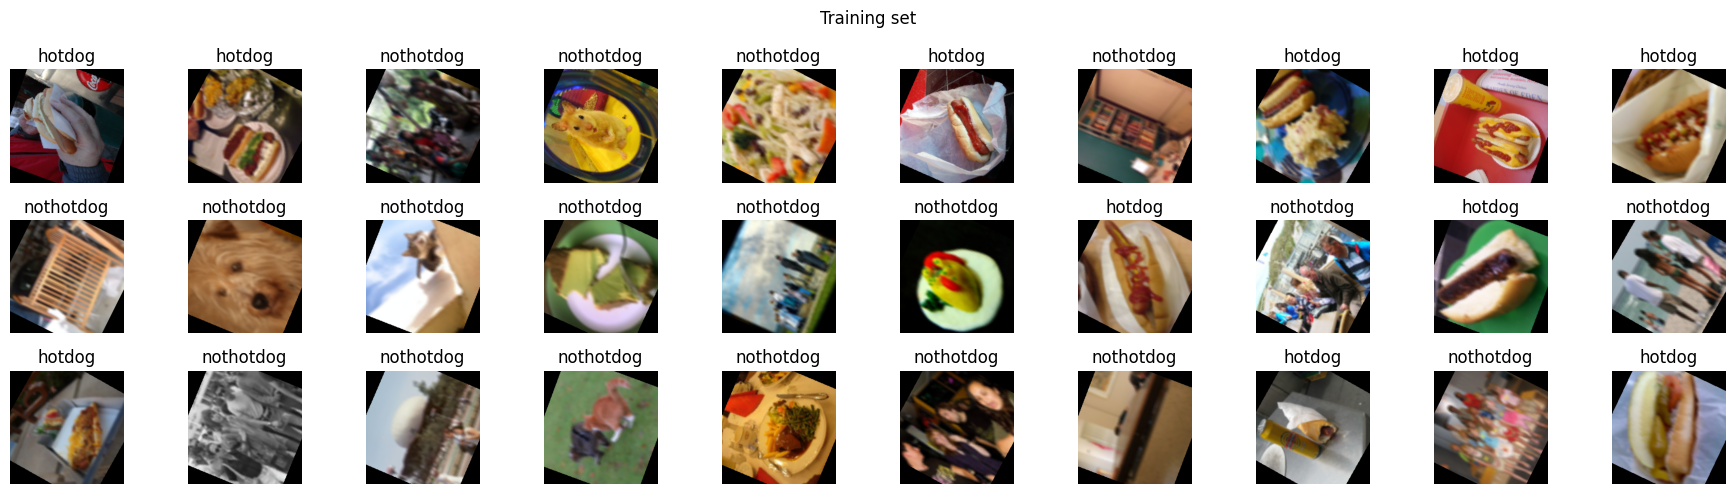

Validation set: 100%|█████████████████████| 10/10 [00:00<00:00, 258.75it/s]


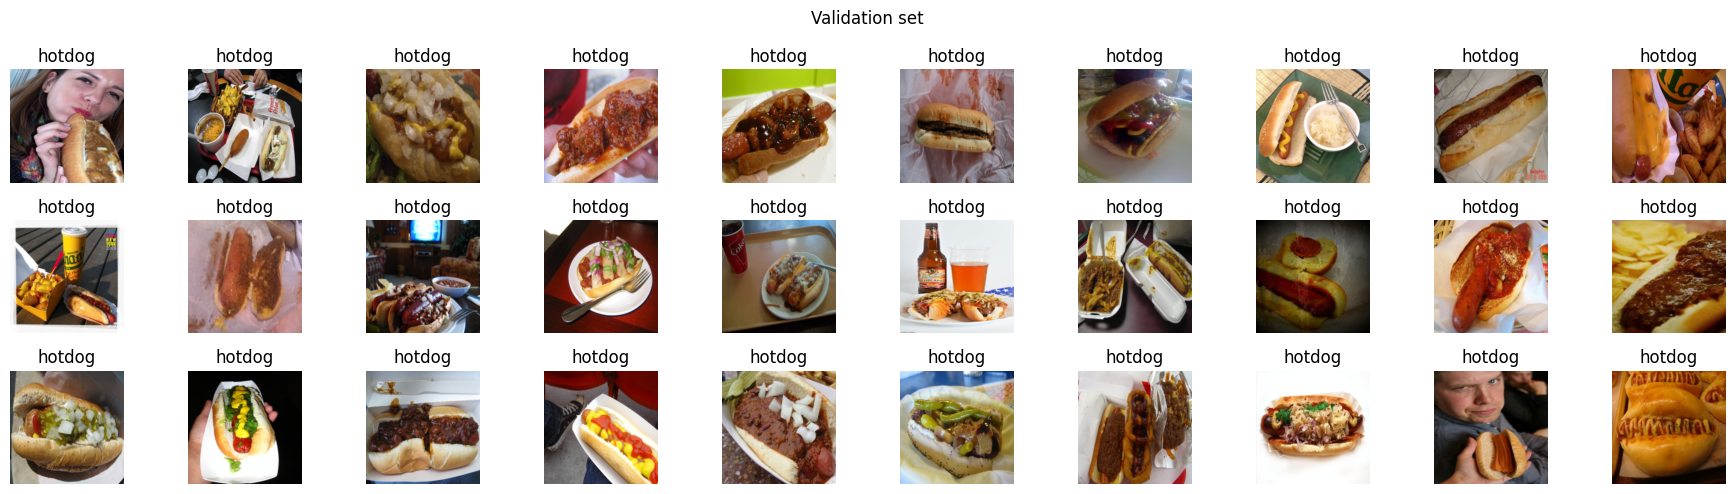

Test set: 100%|███████████████████████████| 10/10 [00:00<00:00, 261.82it/s]


In [10]:
# Get example training batch
batch, targets = next(iter(trainloader)) 
visualize_examples(batch, targets, "Training set", save_path="/zhome/b8/5/147299/Desktop")

# Get example validation batch
batch, targets = next(iter(valloader)) 
visualize_examples(batch, targets, "Validation set", save_path="/zhome/b8/5/147299/Desktop")

# Get example test batch
batch, targets = next(iter(testloader)) 
visualize_examples(batch, targets, "Test set", save_path="/zhome/b8/5/147299/Desktop")